In [26]:
# gestión de datos
import numpy as np
import pandas as pd

# # fechas
# import datetime as dt
# from datetime import datetime
# from dateutil.relativedelta import relativedelta

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# modelos
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier: el equivalente del Adaline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# interpretabilidad
import shap

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

np.random.seed(42)

Datos

In [27]:
df = pd.read_csv('lluvia.csv', index_col=0)

In [28]:
df.tail()

,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,1030,1027,31.0,14.0,5.0,14,6,NaN,0.00,8.0,NE,0,0,0,1,0
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,1031,1027,1023,31.0,14.0,8.0,27,8,45.0,0.51,7.0,SW,1,0,0,0,0
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,1034,1030,1026,31.0,9.0,0.0,14,8,32.0,2.03,5.0,S,1,0,0,1,0
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,1034,1029,1025,19.0,10.0,6.0,14,5,34.0,0.00,6.0,W,0,0,0,0,0
6811,2015-12-31,12.0,10.0,7.0,10.0,8.0,7.0,100.0,90.0,70.0,1027,1025,1024,31.0,8.0,2.0,14,6,NaN,0.25,6.0,NW,1,0,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6812 entries, 0 to 6811
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             6812 non-null   object 
 1   temperatura_max   6810 non-null   float64
 2   temperatura_med   6809 non-null   float64
 3   temperatura_min   6810 non-null   float64
 4   rocio_max         6810 non-null   float64
 5   rocio_med         6810 non-null   float64
 6   rocio_min         6810 non-null   float64
 7   humedad_max       6810 non-null   float64
 8   humedad_med       6810 non-null   float64
 9   humedad_min       6810 non-null   float64
 10  presion_max       6812 non-null   int64  
 11  presion_med       6812 non-null   int64  
 12  presion_min       6812 non-null   int64  
 13  visibilidad_max   5872 non-null   float64
 14  visibilidad_med   5872 non-null   float64
 15  visibilidad_min   5872 non-null   float64
 16  viento_max        6812 non-null   int64  
 17  

In [30]:
df.isnull().sum()

fecha                  0
temperatura_max        2
temperatura_med        3
temperatura_min        2
rocio_max              2
rocio_med              2
rocio_min              2
humedad_max            2
humedad_med            2
humedad_min            2
presion_max            0
presion_med            0
presion_min            0
visibilidad_max      940
visibilidad_med      940
visibilidad_min      940
viento_max             0
viento_med             0
racha_viento_max    3306
precipitacion          0
nubes               1372
viento_dir             0
ind_lluvia             0
ind_nieve              0
ind_truenos            0
ind_niebla             0
ind_granizo            0
dtype: int64

## Gestion de Nulos

### Temperatura / Humedad

In [31]:
df[df['temperatura_med'].isnull()]

,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
1240,2000-08-22,27.0,NaN,27.0,-1.0,-1.0,-1.0,16.0,16.0,16.0,1015,1015,1015,NaN,NaN,NaN,19,19,NaN,0.0,NaN,W,0,0,0,0,0
1539,2001-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021,1019,1018,NaN,NaN,NaN,26,14,NaN,0.0,NaN,SW,0,0,0,0,0
1540,2001-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021,1019,1016,NaN,NaN,NaN,26,11,NaN,0.0,NaN,W,0,0,0,0,0


In [32]:
df.dropna(subset='temperatura_med',inplace=True)

### Visibilidad

In [33]:
df[df['visibilidad_med'].isnull()]

,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
40,1997-02-10,14.0,7.0,0.0,5.0,3.0,-1.0,100.0,76.0,51.0,1033,1031,1030,NaN,NaN,NaN,8,3,NaN,0.0,NaN,W,0,0,0,0,0
49,1997-02-19,18.0,10.0,2.0,7.0,4.0,2.0,100.0,71.0,40.0,1035,1033,1030,NaN,NaN,NaN,11,3,NaN,0.0,NaN,W,0,0,0,0,0
58,1997-02-28,21.0,11.0,2.0,5.0,2.0,0.0,93.0,59.0,28.0,1035,1033,1031,NaN,NaN,NaN,10,3,NaN,0.0,NaN,N,0,0,0,0,0
59,1997-03-01,21.0,12.0,4.0,6.0,4.0,3.0,93.0,65.0,33.0,1032,1030,1028,NaN,NaN,NaN,8,5,NaN,0.0,NaN,N,0,0,0,0,0
60,1997-03-02,23.0,13.0,4.0,8.0,6.0,3.0,100.0,63.0,31.0,1033,1031,1029,NaN,NaN,NaN,11,3,NaN,0.0,NaN,NW,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5434,2012-03-24,21.0,12.0,4.0,4.0,2.0,-2.0,87.0,53.0,21.0,1023,1021,1020,NaN,NaN,NaN,21,6,40.0,0.0,NaN,SW,0,0,0,0,0
5435,2012-03-25,22.0,12.0,3.0,6.0,1.0,-5.0,87.0,50.0,16.0,1025,1023,1021,NaN,NaN,NaN,11,6,27.0,0.0,NaN,W,0,0,0,0,0
5436,2012-03-26,20.0,12.0,4.0,2.0,-2.0,-6.0,76.0,43.0,18.0,1025,1024,1022,NaN,NaN,NaN,14,8,32.0,0.0,NaN,E,0,0,0,0,0
5440,2012-03-30,23.0,13.0,3.0,-1.0,-3.0,-5.0,70.0,34.0,16.0,1020,1017,1013,NaN,NaN,NaN,14,6,29.0,0.0,NaN,N,0,0,0,0,0


In [34]:
df['fecha'] = pd.to_datetime(df['fecha'])

df = df.sort_values(by='fecha')

In [35]:
df['visibilidad_max'].fillna(method='ffill',inplace=True)
df['visibilidad_med'].fillna(method='ffill',inplace=True)  
df['visibilidad_min'].fillna(method='ffill',inplace=True)      
df['racha_viento_max'].fillna(method='ffill',inplace=True)    
df['precipitacion'].fillna(method='ffill',inplace=True)   
df['nubes'].fillna(method='ffill',inplace=True)                

In [36]:
df['racha_viento_max'].fillna(method='bfill',inplace=True)    


## Categorizacion de las variables

In [37]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O" or dataset[i].dtype.kind=="M"):
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [38]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df)

In [39]:
lista_boolean

['ind_lluvia', 'ind_nieve', 'ind_truenos', 'ind_niebla', 'ind_granizo']

In [40]:
lista_numericas

['temperatura_max',
 'temperatura_med',
 'temperatura_min',
 'rocio_max',
 'rocio_med',
 'rocio_min',
 'humedad_max',
 'humedad_med',
 'humedad_min',
 'presion_max',
 'presion_med',
 'presion_min',
 'visibilidad_max',
 'visibilidad_med',
 'visibilidad_min',
 'viento_max',
 'viento_med',
 'racha_viento_max',
 'precipitacion',
 'nubes']

### Variables Categoricas

#### fecha

In [41]:
lista_categoricas

['fecha', 'viento_dir']

In [42]:
df['fecha' + '_DIA'] = df['fecha'].dt.day
df['fecha' + '_MES'] = df['fecha'].dt.month
df['fecha' + '_AÑO'] = df['fecha'].dt.year
del df['fecha']

In [43]:
df.head()

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,fecha_DIA,fecha_MES,fecha_AÑO
0,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,47.0,0.0,6.0,SW,0,0,0,0,0,1,1,1997
1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0,2,1,1997
2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,47.0,0.0,6.0,W,1,1,0,0,0,3,1,1997
3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0,4,1,1997
4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,40.0,0.0,7.0,N,0,1,0,0,0,5,1,1997


#### dir viento

In [44]:
df['viento_dir'].value_counts()

viento_dir
N     1964
SW    1133
W      978
NE     809
NW     732
S      605
SE     326
E      262
Name: count, dtype: int64

In [45]:
df=pd.get_dummies(data=df, columns=['viento_dir'],dtype=int)

In [46]:
df

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
0,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,47.0,0.00,6.0,0,0,0,0,0,1,1,1997,0,0,0,0,0,0,1,0
1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.00,5.0,1,0,0,0,0,2,1,1997,0,0,0,0,0,1,0,0
2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,47.0,0.00,6.0,1,1,0,0,0,3,1,1997,0,0,0,0,0,0,0,1
3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.00,2.0,0,0,0,0,0,4,1,1997,0,0,0,0,0,0,0,1
4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,40.0,0.00,7.0,0,1,0,0,0,5,1,1997,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,1030,1027,31.0,14.0,5.0,14,6,23.0,0.00,8.0,0,0,0,1,0,27,12,2015,0,0,1,0,0,0,0,0
6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,1031,1027,1023,31.0,14.0,8.0,27,8,45.0,0.51,7.0,1,0,0,0,0,28,12,2015,0,0,0,0,0,0,1,0
6809,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,1034,1030,1026,31.0,9.0,0.0,14,8,32.0,2.03,5.0,1,0,0,1,0,29,12,2015,0,0,0,0,1,0,0,0
6810,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,1034,1029,1025,19.0,10.0,6.0,14,5,34.0,0.00,6.0,0,0,0,0,0,30,12,2015,0,0,0,0,0,0,0,1


## Analisis Correlacion

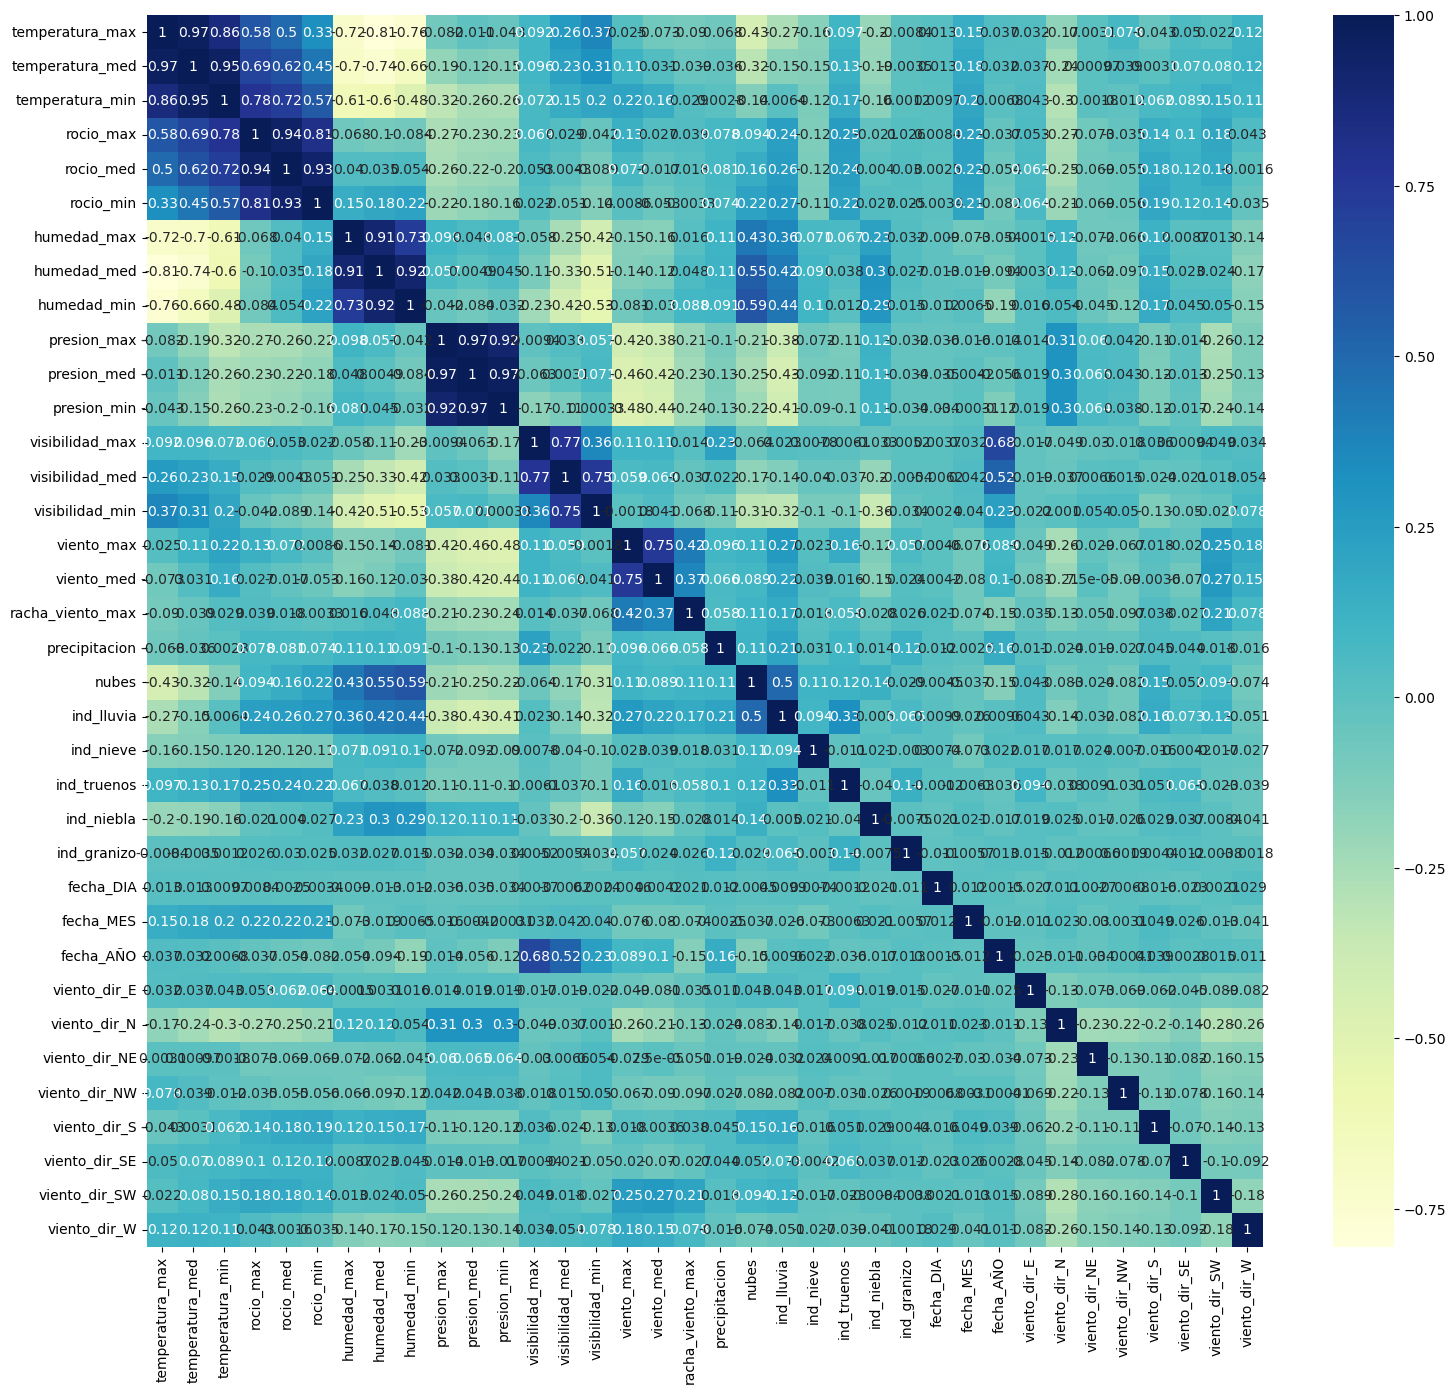

In [47]:
df_corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(data=df_corr, annot=True, cmap='YlGnBu')
plt.show()

In [48]:
df_triangulo = pd.DataFrame(np.triu(df_corr, k=1), columns=df.columns)
df_triangulo.index = df.columns

In [49]:
df_altas_correlaciones = df_triangulo.stack().reset_index()
df_altas_correlaciones.columns = ['variable1', 'variable2', 'correlacion']
df_altas_correlaciones = df_altas_correlaciones[df_altas_correlaciones['correlacion'].abs() > 0.9]
df_altas_correlaciones

,variable1,variable2,correlacion
1,temperatura_max,temperatura_med,0.970983
38,temperatura_med,temperatura_min,0.951917
112,rocio_max,rocio_med,0.944166
149,rocio_med,rocio_min,0.927185
223,humedad_max,humedad_med,0.906903
260,humedad_med,humedad_min,0.919701
334,presion_max,presion_med,0.973039
335,presion_max,presion_min,0.916791
371,presion_med,presion_min,0.968591


In [51]:
print(df_altas_correlaciones)

           variable1        variable2  correlacion
1    temperatura_max  temperatura_med     0.970983
38   temperatura_med  temperatura_min     0.951917
112        rocio_max        rocio_med     0.944166
149        rocio_med        rocio_min     0.927185
223      humedad_max      humedad_med     0.906903
260      humedad_med      humedad_min     0.919701
334      presion_max      presion_med     0.973039
335      presion_max      presion_min     0.916791
371      presion_med      presion_min     0.968591


## Variable Objetivo

In [52]:
df['lluvia_D+1'] = df['ind_lluvia'].shift(-1)
target = 'lluvia_D+1'

### Variables VS Target

In [53]:
corr_con_target = df.corr()[target]
corr_con_target

temperatura_max    -0.207123
temperatura_med    -0.144188
temperatura_min    -0.051082
rocio_max           0.099091
rocio_med           0.132275
rocio_min           0.175036
humedad_max         0.236970
humedad_med         0.291614
humedad_min         0.316341
presion_max        -0.289282
presion_med        -0.309912
presion_min        -0.307047
visibilidad_max     0.020777
visibilidad_med    -0.089367
visibilidad_min    -0.188057
viento_max          0.122957
viento_med          0.092590
racha_viento_max    0.104761
precipitacion       0.112429
nubes               0.331664
ind_lluvia          0.369241
ind_nieve           0.033559
ind_truenos         0.133330
ind_niebla          0.023697
ind_granizo         0.012800
fecha_DIA           0.007758
fecha_MES          -0.024498
fecha_AÑO           0.009446
viento_dir_E        0.026297
viento_dir_N       -0.123379
viento_dir_NE      -0.016698
viento_dir_NW      -0.085924
viento_dir_S        0.142855
viento_dir_SE       0.086594
viento_dir_SW 

In [54]:
df_altas_correlaciones['corr_var1_target'] = df_altas_correlaciones['variable1'].apply(lambda x: corr_con_target[x])
df_altas_correlaciones['corr_var2_target'] = df_altas_correlaciones['variable2'].apply(lambda x: corr_con_target[x])
df_altas_correlaciones

,variable1,variable2,correlacion,corr_var1_target,corr_var2_target
1,temperatura_max,temperatura_med,0.970983,-0.207123,-0.144188
38,temperatura_med,temperatura_min,0.951917,-0.144188,-0.051082
112,rocio_max,rocio_med,0.944166,0.099091,0.132275
149,rocio_med,rocio_min,0.927185,0.132275,0.175036
223,humedad_max,humedad_med,0.906903,0.236970,0.291614
260,humedad_med,humedad_min,0.919701,0.291614,0.316341
334,presion_max,presion_med,0.973039,-0.289282,-0.309912
335,presion_max,presion_min,0.916791,-0.289282,-0.307047
371,presion_med,presion_min,0.968591,-0.309912,-0.307047


In [55]:
df_altas_correlaciones['var_menos_corr'] = df_altas_correlaciones.apply(
    lambda linea: linea['variable1'] if np.abs(linea['corr_var1_target']) < np.abs(linea['corr_var2_target']) else linea['variable2'], axis=1)
df_altas_correlaciones

,variable1,variable2,correlacion,corr_var1_target,corr_var2_target,var_menos_corr
1,temperatura_max,temperatura_med,0.970983,-0.207123,-0.144188,temperatura_med
38,temperatura_med,temperatura_min,0.951917,-0.144188,-0.051082,temperatura_min
112,rocio_max,rocio_med,0.944166,0.099091,0.132275,rocio_max
149,rocio_med,rocio_min,0.927185,0.132275,0.175036,rocio_med
223,humedad_max,humedad_med,0.906903,0.236970,0.291614,humedad_max
260,humedad_med,humedad_min,0.919701,0.291614,0.316341,humedad_med
334,presion_max,presion_med,0.973039,-0.289282,-0.309912,presion_max
335,presion_max,presion_min,0.916791,-0.289282,-0.307047,presion_max
371,presion_med,presion_min,0.968591,-0.309912,-0.307047,presion_min


In [56]:
var_menos_corr = list(set(df_altas_correlaciones['var_menos_corr']))
var_menos_corr

['humedad_med',
 'presion_min',
 'temperatura_med',
 'rocio_med',
 'humedad_max',
 'presion_max',
 'temperatura_min',
 'rocio_max']

In [57]:
df.drop(columns=var_menos_corr, inplace=True)
df

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W,lluvia_D+1
0,7.0,2.0,76.0,1008,10.0,9.0,4.0,13,6,47.0,0.00,6.0,0,0,0,0,0,1,1,1997,0,0,0,0,0,0,1,0,1.0
1,7.0,0.0,71.0,1003,10.0,9.0,4.0,26,8,47.0,0.00,5.0,1,0,0,0,0,2,1,1997,0,0,0,0,0,1,0,0,1.0
2,5.0,-1.0,70.0,999,10.0,10.0,7.0,27,19,47.0,0.00,6.0,1,1,0,0,0,3,1,1997,0,0,0,0,0,0,0,1,0.0
3,7.0,-4.0,49.0,1010,10.0,10.0,10.0,27,19,40.0,0.00,2.0,0,0,0,0,0,4,1,1997,0,0,0,0,0,0,0,1,0.0
4,2.0,-3.0,86.0,1008,10.0,5.0,1.0,14,6,40.0,0.00,7.0,0,1,0,0,0,5,1,1997,0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,14.0,-2.0,30.0,1030,31.0,14.0,5.0,14,6,23.0,0.00,8.0,0,0,0,1,0,27,12,2015,0,0,1,0,0,0,0,0,1.0
6808,15.0,1.0,34.0,1027,31.0,14.0,8.0,27,8,45.0,0.51,7.0,1,0,0,0,0,28,12,2015,0,0,0,0,0,0,1,0,1.0
6809,11.0,5.0,66.0,1030,31.0,9.0,0.0,14,8,32.0,2.03,5.0,1,0,0,1,0,29,12,2015,0,0,0,0,1,0,0,0,0.0
6810,9.0,5.0,70.0,1029,19.0,10.0,6.0,14,5,34.0,0.00,6.0,0,0,0,0,0,30,12,2015,0,0,0,0,0,0,0,1,1.0


## BAJA VARIANZA

In [58]:
var_poca_varianza = []
print('baja varianza:')

for col in df.columns:
  if df[col].var() < 0.01:
    print(col, df[col].var())
    var_poca_varianza.append(col)
print('eliminar', var_poca_varianza)

baja varianza:
ind_nieve 0.007724362188083214
ind_granizo 0.0011737075022878922
eliminar ['ind_nieve', 'ind_granizo']


In [59]:
df.drop(columns=var_poca_varianza, inplace=True)
df

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_truenos,ind_niebla,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W,lluvia_D+1
0,7.0,2.0,76.0,1008,10.0,9.0,4.0,13,6,47.0,0.00,6.0,0,0,0,1,1,1997,0,0,0,0,0,0,1,0,1.0
1,7.0,0.0,71.0,1003,10.0,9.0,4.0,26,8,47.0,0.00,5.0,1,0,0,2,1,1997,0,0,0,0,0,1,0,0,1.0
2,5.0,-1.0,70.0,999,10.0,10.0,7.0,27,19,47.0,0.00,6.0,1,0,0,3,1,1997,0,0,0,0,0,0,0,1,0.0
3,7.0,-4.0,49.0,1010,10.0,10.0,10.0,27,19,40.0,0.00,2.0,0,0,0,4,1,1997,0,0,0,0,0,0,0,1,0.0
4,2.0,-3.0,86.0,1008,10.0,5.0,1.0,14,6,40.0,0.00,7.0,0,0,0,5,1,1997,0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,14.0,-2.0,30.0,1030,31.0,14.0,5.0,14,6,23.0,0.00,8.0,0,0,1,27,12,2015,0,0,1,0,0,0,0,0,1.0
6808,15.0,1.0,34.0,1027,31.0,14.0,8.0,27,8,45.0,0.51,7.0,1,0,0,28,12,2015,0,0,0,0,0,0,1,0,1.0
6809,11.0,5.0,66.0,1030,31.0,9.0,0.0,14,8,32.0,2.03,5.0,1,0,1,29,12,2015,0,0,0,0,1,0,0,0,0.0
6810,9.0,5.0,70.0,1029,19.0,10.0,6.0,14,5,34.0,0.00,6.0,0,0,0,30,12,2015,0,0,0,0,0,0,0,1,1.0


## MODELADO

In [60]:
df.tail(5)

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_truenos,ind_niebla,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W,lluvia_D+1
6807,14.0,-2.0,30.0,1030,31.0,14.0,5.0,14,6,23.0,0.00,8.0,0,0,1,27,12,2015,0,0,1,0,0,0,0,0,1.0
6808,15.0,1.0,34.0,1027,31.0,14.0,8.0,27,8,45.0,0.51,7.0,1,0,0,28,12,2015,0,0,0,0,0,0,1,0,1.0
6809,11.0,5.0,66.0,1030,31.0,9.0,0.0,14,8,32.0,2.03,5.0,1,0,1,29,12,2015,0,0,0,0,1,0,0,0,0.0
6810,9.0,5.0,70.0,1029,19.0,10.0,6.0,14,5,34.0,0.00,6.0,0,0,0,30,12,2015,0,0,0,0,0,0,0,1,1.0
6811,12.0,7.0,70.0,1025,31.0,8.0,2.0,14,6,34.0,0.25,6.0,1,0,0,31,12,2015,0,0,0,1,0,0,0,0,NaN


### dataset a entrenar y dataset a predecir

In [61]:
# quitamos la última fila del dataset para entrenar
df_entrenar = df.head(-1)

# nos quedamos solo con la última fila para predecir
df_predecir = df.tail(1)

# quitamos la variable lluvia_D+1 del dataset a predecir
df_predecir.drop(target, axis=1, inplace=True)

In [62]:
df_entrenar

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_truenos,ind_niebla,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W,lluvia_D+1
0,7.0,2.0,76.0,1008,10.0,9.0,4.0,13,6,47.0,0.00,6.0,0,0,0,1,1,1997,0,0,0,0,0,0,1,0,1.0
1,7.0,0.0,71.0,1003,10.0,9.0,4.0,26,8,47.0,0.00,5.0,1,0,0,2,1,1997,0,0,0,0,0,1,0,0,1.0
2,5.0,-1.0,70.0,999,10.0,10.0,7.0,27,19,47.0,0.00,6.0,1,0,0,3,1,1997,0,0,0,0,0,0,0,1,0.0
3,7.0,-4.0,49.0,1010,10.0,10.0,10.0,27,19,40.0,0.00,2.0,0,0,0,4,1,1997,0,0,0,0,0,0,0,1,0.0
4,2.0,-3.0,86.0,1008,10.0,5.0,1.0,14,6,40.0,0.00,7.0,0,0,0,5,1,1997,0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,12.0,-2.0,56.0,1033,14.0,7.0,3.0,11,5,23.0,0.00,5.0,0,0,0,26,12,2015,0,1,0,0,0,0,0,0,0.0
6807,14.0,-2.0,30.0,1030,31.0,14.0,5.0,14,6,23.0,0.00,8.0,0,0,1,27,12,2015,0,0,1,0,0,0,0,0,1.0
6808,15.0,1.0,34.0,1027,31.0,14.0,8.0,27,8,45.0,0.51,7.0,1,0,0,28,12,2015,0,0,0,0,0,0,1,0,1.0
6809,11.0,5.0,66.0,1030,31.0,9.0,0.0,14,8,32.0,2.03,5.0,1,0,1,29,12,2015,0,0,0,0,1,0,0,0,0.0


In [63]:
df_predecir

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_truenos,ind_niebla,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
6811,12.0,7.0,70.0,1025,31.0,8.0,2.0,14,6,34.0,0.25,6.0,1,0,0,31,12,2015,0,0,0,1,0,0,0,0


### Rebalanceado

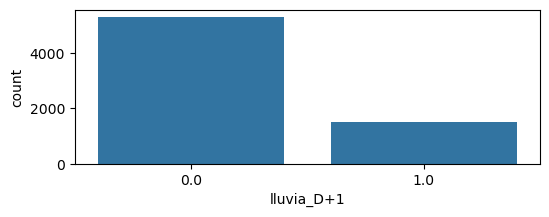

In [64]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_entrenar, x=target)
plt.show()

In [65]:
df_entrenar[target].value_counts(normalize=True)

lluvia_D+1
0.0    0.779671
1.0    0.220329
Name: proportion, dtype: float64

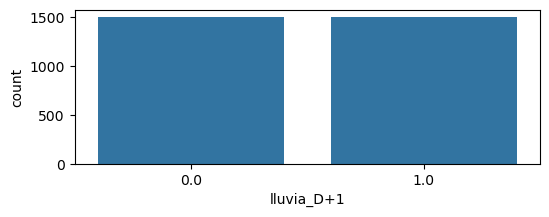

3000 observaciones para entrenar


In [66]:
# separamos las 2 categorias
df_lluvia = df_entrenar[df_entrenar[target] == 1]
df_no_lluvia = df_entrenar[df_entrenar[target] == 0]

# se selecciona de forma aleatoria el mismo número de dias de no lluvia que días de lluvia para equilibrar el dataset, sin posibilidad de repetir, con sample
df_no_lluvia = df_no_lluvia.sample(len(df_lluvia), replace=False, random_state=42)

# se juntan los dataframes de lluvia y no lluvia en el df_entrenar con concat
df_entrenar = pd.concat([df_lluvia, df_no_lluvia])

fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_entrenar, x=target)
plt.show()

print(len(df_entrenar), 'observaciones para entrenar')

### Importancia Variables

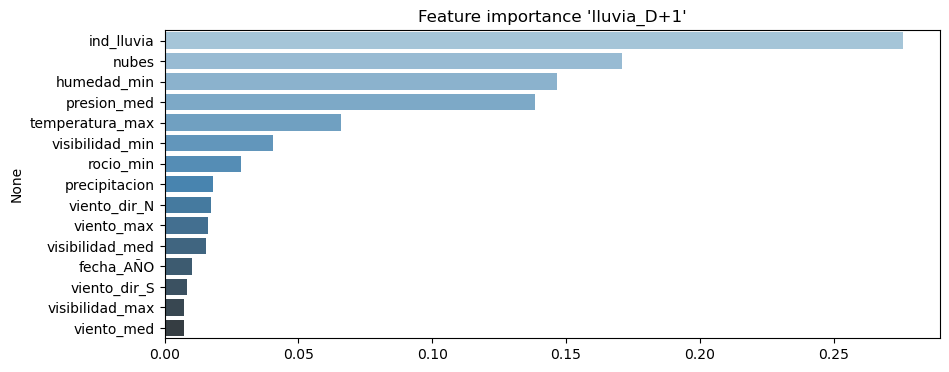

In [67]:
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}

x, y = df_entrenar.drop(target,axis=1), df_entrenar[target]
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plotea las 15 mejores Features importances
num_features = 15
features = clf.feature_importances_
columnas = x.columns
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)[:num_features]
plt.figure(figsize=(10,4))
plt.title("Feature importance '{}'".format(target))
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()

### Separacion Traint/Test

X_Train:Variables Independientes df_train

Y_Train:Target df_train

X_Test:Variables Independientes df_test

Y_Test:Target df_test

In [68]:
# se guarda la target como 'y' y las features como 'X'
y = df_entrenar[target]
X = df_entrenar.drop(target, axis=1)

In [69]:
x

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_truenos,ind_niebla,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
0,7.0,2.0,76.0,1008,10.0,9.0,4.0,13,6,47.0,0.0,6.0,0,0,0,1,1,1997,0,0,0,0,0,0,1,0
1,7.0,0.0,71.0,1003,10.0,9.0,4.0,26,8,47.0,0.0,5.0,1,0,0,2,1,1997,0,0,0,0,0,1,0,0
6,2.0,-3.0,75.0,1014,10.0,7.0,0.0,6,2,40.0,0.0,7.0,0,0,0,7,1,1997,0,0,1,0,0,0,0,0
7,8.0,1.0,87.0,1005,10.0,8.0,4.0,26,8,40.0,0.0,7.0,1,0,0,8,1,1997,0,0,0,0,0,0,0,1
13,11.0,0.0,50.0,1020,10.0,9.0,1.0,14,2,48.0,0.0,4.0,0,0,0,14,1,1997,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,37.0,4.0,9.0,1020,31.0,31.0,31.0,16,10,37.0,0.0,1.0,0,0,0,20,8,2013,0,0,1,0,0,0,0,0
6311,34.0,9.0,13.0,1012,31.0,23.0,10.0,26,10,48.0,0.0,1.0,0,0,0,18,8,2014,0,0,0,0,0,0,1,0
2290,26.0,-5.0,13.0,1016,10.0,10.0,10.0,23,13,37.0,0.0,1.0,0,0,0,16,7,2003,0,0,0,0,0,0,0,1
5143,20.0,11.0,60.0,1008,10.0,8.0,1.0,24,5,39.0,0.0,4.0,1,1,0,7,6,2011,1,0,0,0,0,0,0,0


In [70]:
y

0       1.0
1       1.0
6       1.0
7       1.0
13      1.0
       ... 
5948    0.0
6311    0.0
2290    0.0
5143    0.0
5255    0.0
Name: lluvia_D+1, Length: 3000, dtype: float64

In [71]:
# se utilizan 70% de los datos para entrenar el modelo y se guardan 30% de los datos para evaluar el modelo (de forma aleatoria)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
print('nº observaciones de train:', len(y_train))
print('nº observaciones de test: ', len(y_test))

nº observaciones de train: 2100
nº observaciones de test:  900


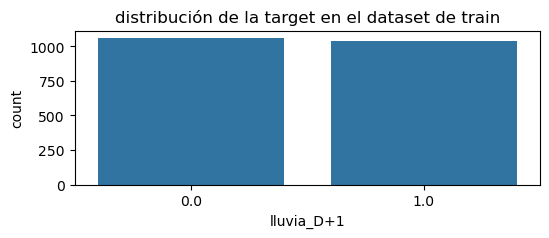

In [73]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(x=y_train)
plt.title('distribución de la target en el dataset de train')
plt.show()

In [74]:
y_train.value_counts(normalize=True).mul(100)

lluvia_D+1
0.0    50.52381
1.0    49.47619
Name: proportion, dtype: float64

In [75]:
y_test.value_counts(normalize=True).mul(100)

lluvia_D+1
1.0    51.222222
0.0    48.777778
Name: proportion, dtype: float64

## estandarización de variables

In [76]:
# guardo las columnas del dataset en una lista antes de standarizar
# el metodo scaler quita el nombre de las variables
# para la interpretabilidad, si el modelo ganador es un arbol de decisión, conviene guardar el nombre de las variables
variables_entrenadas = X.columns

In [77]:
# se estandarizan las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)         # estandariza según la regla definida con el X_train, con la media de X_train

# se estandarizan las variables del dataset a predecir según la regla definida con el X_train
X_predecir = scaler.transform(df_predecir)

### Modelos a Utilizar

In [78]:
# añadimos en una lista los modelos que queremos poner a competir

modelos = []
modelos.append(('Perceptron', Perceptron(random_state=42)))
modelos.append(('SGDClassifier', SGDClassifier(loss='log_loss', random_state=42)))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)))
modelos.append(('XGBClassifier', XGBClassifier(random_state=42, verbosity=0)))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False, random_seed=42)))
modelos.append(('LogisticRegression', LogisticRegression(random_state=42)))

In [79]:
metricas_modelos = pd.DataFrame(columns=['modelo', 'AUC'])

for nombre, modelo in modelos:

    # entrenamos el modelo
    modelo.fit(X_train, y_train)

    # hacemos la predicción sobre el dataset de test
    # al AUC se saca con predict_proba.
    # para el perceptron, usaremos decision_function, el equivalente del predict_proba para este algoritmo
    if nombre == 'Perceptron':
      y_pred = modelo.decision_function(X_test)
    else:
      y_pred = modelo.predict_proba(X_test)[:, 1]

    # calculamos el AUC
    auc = metrics.roc_auc_score(y_test, y_pred)

    # imprimimos el resultado por modelo
    metricas_modelos = pd.concat([metricas_modelos,
                                  pd.DataFrame({'modelo': nombre, 'AUC': auc}, index=[0])
                                  ])
    print(modelo, auc)

metricas_modelos.sort_values('AUC', ascending=False)

Perceptron(random_state=42) 0.674902040231447
SGDClassifier(loss='log_loss', random_state=42) 0.7230097984474674
GradientBoostingClassifier(random_state=42) 0.8176490643792093
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 0.789439615770411
<catboost.core.CatBoostClassifier object at 0x0000

,modelo,AUC
0,CatBoostClassifier,0.820871
0,LogisticRegression,0.818865
0,GradientBoostingClassifier,0.817649
0,XGBClassifier,0.789440
0,SGDClassifier,0.723010
0,Perceptron,0.674902


### Hiperparametrizado

In [82]:
# gridsearch
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1],
              'iterations': [300, 500, 800, 1000, 1200],
              'max_depth': [4, 5, 6, 7],
              'eval_metric': ['Logloss', 'AUC'],
              'verbose': [False]}

In [83]:
modelo = CatBoostClassifier()

In [ ]:
 # se prueban todas las combinaciones de parametros
#modelo_grid = GridSearchCV(modelo,
#                          parameters,
#                           cv=2,
#                          verbose=True)

 #modelo_grid.fit(X_train, y_train)

 # se imprime el modelo con los mejores parametros
 #print('mejores parametros:')
 #modelo_grid.best_params_

Fitting 2 folds for each of 160 candidates, totalling 320 fits
mejores parametros:


{'eval_metric': 'Logloss',
 'iterations': 500,
 'learning_rate': 0.01,
 'max_depth': 7,
 'verbose': False}

In [ ]:
# selección del mejor modelo8 con los mejores parámetros
modelo =  CatBoostClassifier(eval_metric='Logloss',
 iterations=500,
 learning_rate= 0.01,
 max_depth= 7,
 verbose= False,
   random_seed=42)

# entrenamiento
modelo.fit(X_train, y_train)

In [92]:
modelo.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'l

### Evaluación Final

In [93]:
# evalucación sobre el dataset de train

# predicción en el dataset de train
y_pred_train = modelo.predict_proba(X_train)

# evaluación de la métrica
auc_train = metrics.roc_auc_score(y_train, y_pred_train[:,1])
print('auc train:', auc_train)

auc train: 0.9635433911567619


In [94]:
# evalucación sobre el dataset de test

# predicción en el dataset de test
y_pred_test = modelo.predict_proba(X_test)

# evaluación de la métrica
auc_test = metrics.roc_auc_score(y_test, y_pred_test[:,1])
print('auc test:', auc_test)

auc test: 0.8208707425177515


### Metricas a parte

In [95]:
y_train_pred = modelo.predict(X_train)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = modelo.predict(X_test)                          # predicciones del modelo en los datos de TEST

In [96]:
y_train_pred_proba = modelo.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = modelo.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

In [97]:
# metricas para la curva ROC
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred_proba)

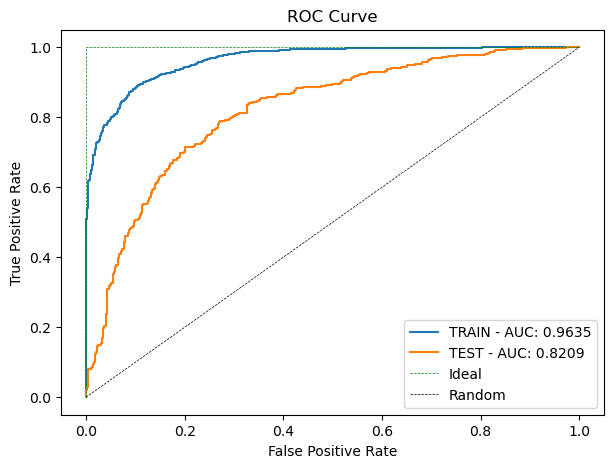

In [98]:
#Plot
plt.figure(figsize=[7,5])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Matriz de confusion

In [99]:
cm_test = metrics.confusion_matrix(y_test, y_test_pred)

[]

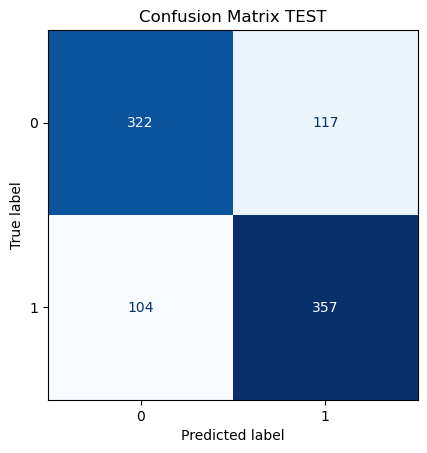

In [100]:
# gráfico de la matriz de confusión en cantidades
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST')
plt.plot()

[]

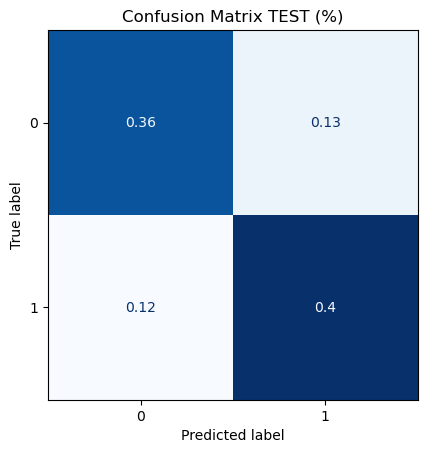

In [101]:
# gráfico de la matriz de confusión en %
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test))
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST (%)')
plt.plot()

### Acuracy, Precision, Recall, f1_score

In [102]:
cm_test

array([[322, 117],
       [104, 357]], dtype=int64)

In [103]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [104]:
# accuracy
accuracy = (TN+TP)/total

# precision
precision = TP/(TP+FP)

# recall
recall = TP/(TP+FN)

# f1_score
f1_score = 2/(1/recall + 1/precision)

In [105]:
print('accuracy:', round(accuracy,4))
print('precision:', round(precision, 4))
print('recall:', round(recall, 4))
print('f1_score:', round(f1_score, 4))

accuracy: 0.7544
precision: 0.7532
recall: 0.7744
f1_score: 0.7636


Con scikit-learn, se hace directemente:

In [106]:
accuracy_sklearn = metrics.accuracy_score(y_test, y_test_pred)
precision_sklearn = metrics.precision_score(y_test, y_test_pred)
recall_sklearn = metrics.recall_score(y_test, y_test_pred)
f1_score_sklearn = metrics.f1_score(y_test, y_test_pred)

In [107]:
print('accuracy:', round(accuracy_sklearn,4))
print('precision:', round(precision_sklearn, 4))
print('recall:', round(recall_sklearn, 4))
print('f1_score:', round(f1_score_sklearn, 4))

accuracy: 0.7544
precision: 0.7532
recall: 0.7744
f1_score: 0.7636


### Modelo con regresion logistica

In [108]:
modelo_reg_logistic = LogisticRegression(random_state=42)

# entrenamiento
modelo_reg_logistic.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [109]:
# Coeficientes (pesos) de las variables
print("Coeficientes:", modelo_reg_logistic.coef_[0])

# Intercept (constante)
print("Intercept:", modelo_reg_logistic.intercept_)

Coeficientes: [-0.51139189  0.34569737  0.08827498 -0.54038706  0.17270133 -0.31271889
  0.00535206  0.11748936 -0.2728123   0.05263145  0.11158384  0.35050402
  0.07714607  0.24974548 -0.10996514 -0.00830256 -0.04973657  0.22200148
  0.06303655 -0.19938215  0.01820231 -0.06432354  0.09252262  0.14513158
  0.0659676  -0.00982353]
Intercept: [0.02455612]


In [110]:
# creamos un dataframe con el nombre de las variables para facilitar la vista
coeficientes = pd.DataFrame()
coeficientes['variable'] = variables_entrenadas
coeficientes['coeficiente'] = modelo_reg_logistic.coef_[0]


dict_intercept = {'variable': ['intercept'],
                  'coeficiente':  modelo_reg_logistic.intercept_}
intercept = pd.DataFrame(dict_intercept)

coeficientes = pd.concat([coeficientes, intercept], ignore_index=True)
coeficientes

,variable,coeficiente
0,temperatura_max,-0.511392
1,rocio_min,0.345697
2,humedad_min,0.088275
3,presion_med,-0.540387
4,visibilidad_max,0.172701
5,visibilidad_med,-0.312719
6,visibilidad_min,0.005352
7,viento_max,0.117489
8,viento_med,-0.272812
9,racha_viento_max,0.052631


## modelo de árbol de decisión

In [111]:
# creamos un dataframe con los datos de X_test y las variables como columnas (por eso las guardamos antes)
df_X_test = pd.DataFrame(X_test, columns=variables_entrenadas)
df_X_test

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_truenos,ind_niebla,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
0,0.095650,0.205548,-0.840452,-0.535995,1.999609,1.148306,0.047831,0.125647,1.216093,-0.744708,-0.141098,-0.167515,-0.673266,-0.251577,-0.225945,0.120342,0.716616,1.583852,-0.204124,-0.593483,-0.357519,-0.300571,-0.349849,-0.260030,-0.496277,2.549510
1,1.457445,0.827822,-1.038172,1.246176,1.999609,2.551473,0.257091,-0.862216,-0.660180,-0.744708,-0.141098,1.463619,1.485297,-0.251577,-0.225945,-0.559313,-0.427355,1.045679,-0.204124,-0.593483,-0.357519,3.327005,-0.349849,-0.260030,-0.496277,-0.392232
2,1.797893,0.620397,-1.137032,0.503605,-0.492978,-0.254861,0.257091,-0.170712,-0.660180,0.025490,-0.141098,-1.254938,-0.673266,-0.251577,-0.225945,1.026549,0.430623,0.686897,-0.204124,-0.593483,-0.357519,-0.300571,-0.349849,-0.260030,2.015004,-0.392232
3,-0.925696,-1.039000,0.988459,1.691719,-0.492978,-0.455313,-0.370690,-1.158575,-0.847808,0.256549,-0.141098,-1.254938,-0.673266,-0.251577,-0.225945,1.366376,1.288602,-1.286404,-0.204124,1.684970,-0.357519,-0.300571,-0.349849,-0.260030,-0.496277,-0.392232
4,-0.358282,0.620397,0.691879,3.028348,-0.492978,-0.856218,-1.207731,-1.257362,-0.847808,0.410589,-0.141098,-0.167515,-0.673266,-0.251577,4.425860,-0.559313,-1.285333,-0.927622,-0.204124,-0.593483,-0.357519,3.327005,-0.349849,-0.260030,-0.496277,-0.392232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.684410,-0.001877,-1.285322,0.355091,-0.492978,-0.254861,0.257091,0.026860,-0.284926,-0.205570,-0.141098,-0.167515,-0.673266,-0.251577,-0.225945,0.799997,-0.141362,-0.748231,-0.204124,-0.593483,-0.357519,-0.300571,-0.349849,-0.260030,-0.496277,2.549510
896,-0.131316,1.450096,0.691879,-0.833024,-0.492978,-0.455313,-1.416991,0.323219,1.591348,0.564629,-0.141098,1.463619,1.485297,-0.251577,-0.225945,0.799997,-0.427355,0.328115,-0.204124,-0.593483,-0.357519,-0.300571,-0.349849,-0.260030,2.015004,-0.392232
897,1.003513,-0.624151,-0.939312,-0.387481,-0.492978,-0.254861,0.257091,0.323219,-0.660180,-0.436629,-0.141098,-1.254938,-0.673266,-0.251577,-0.225945,-0.219485,0.716616,-0.927622,-0.204124,1.684970,-0.357519,-0.300571,-0.349849,-0.260030,-0.496277,-0.392232
898,-0.358282,1.450096,1.235609,-1.278567,-0.492978,-0.455313,-1.416991,-0.862216,-0.847808,0.410589,-0.141098,1.463619,1.485297,-0.251577,-0.225945,-1.352244,1.002609,-1.465795,4.898979,-0.593483,-0.357519,-0.300571,-0.349849,-0.260030,-0.496277,-0.392232


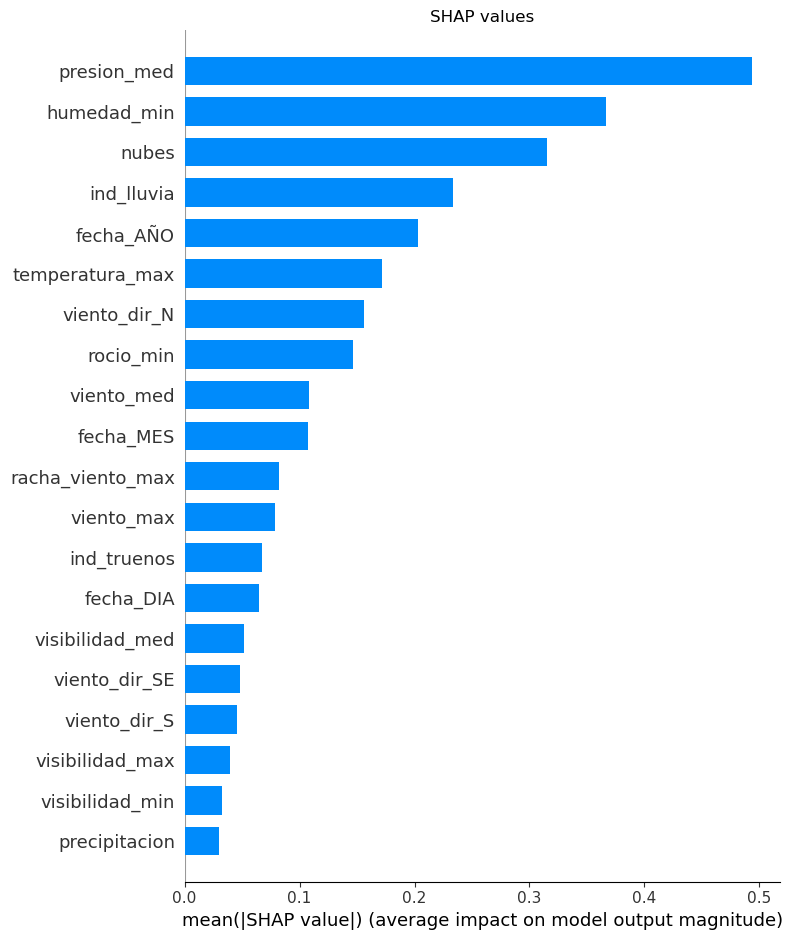

In [112]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(df_X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, df_X_test, plot_type="bar", max_display=20)

#Los SHAP values nos indican ademas el sentido del impacto que tiene la variable en la predicción (positivo/negativo):
* Rojo a la derecha = POSITIVO (+)
* Rojo a la izquierda = NEGATIVO (-)

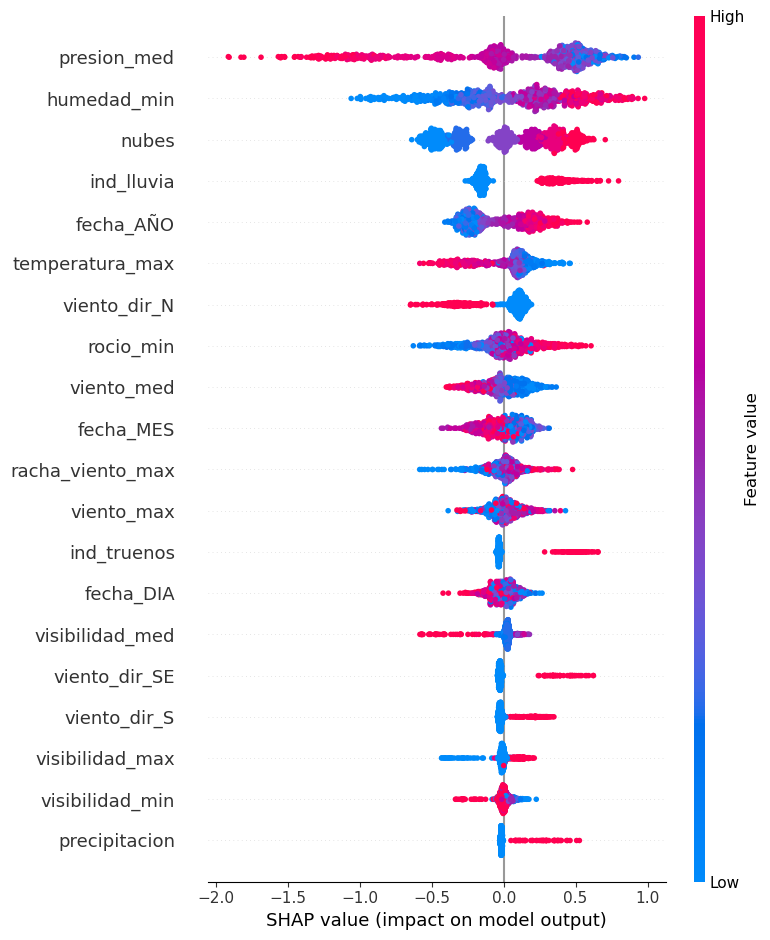

In [115]:
shap.summary_plot(shap_values, df_X_test)

In [116]:
df_predecir

,temperatura_max,rocio_min,humedad_min,presion_med,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_truenos,ind_niebla,fecha_DIA,fecha_MES,fecha_AÑO,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
6811,12.0,7.0,70.0,1025,31.0,8.0,2.0,14,6,34.0,0.25,6.0,1,0,0,31,12,2015,0,0,0,1,0,0,0,0


In [117]:
X_predecir

array([[-0.9256962 ,  1.03524677,  1.58161929,  1.2461765 ,  1.99960895,
        -0.65576576, -1.41699129, -0.86221649, -0.66018022, -0.82172813,
         0.0539939 ,  1.46361948,  1.4852969 , -0.2515773 , -0.2259448 ,
         1.70620379,  1.57459429,  1.58385172, -0.20412415, -0.59348252,
        -0.3575186 ,  3.32700549, -0.34984917, -0.26003011, -0.49627694,
        -0.39223227]])

In [118]:
predict = modelo.predict(X_predecir)[0]
predict_proba = modelo.predict_proba(X_predecir)[:,1][0]

print('Catboost:')
print('Mañana llueve:',predict)
print('Probabilidad de lluvia: {:.2%}'.format(predict_proba))

Catboost:
Mañana llueve: 1.0
Probabilidad de lluvia: 89.31%


In [119]:
# predicción con la regresión logística
predict_reg_logistic = modelo_reg_logistic.predict(X_predecir)[0]
predict_proba_reg_logistic = modelo_reg_logistic.predict_proba(X_predecir)[:,1][0]

print('Regresión logística:')
print('Mañana llueve:',predict_reg_logistic)
print('Probabilidad de lluvia: {:.2%}'.format(predict_proba_reg_logistic))

Regresión logística:
Mañana llueve: 1.0
Probabilidad de lluvia: 82.36%
